# Long Short-Term Memory (LSTM)

## What is LSTM? 
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. 
LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images.
This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

worth watching: https://www.youtube.com/watch?v=b61DPVFX03I&t=329s

## Our LSTM Implementation:

Our implementation of the LSTM is available in `./src/lstm.py`. The implementation includes the model as well as all that's needed for the test besnch to be able to use the model. let's check it out:

In [1]:
import src.lstm as lstm
import src.test_bench as bench

[TEST BENCH] Powering on test bench
[TEST BENCH] testing metric='node_mem', app='moc/smaug'.
[TEST BENCH] Fetching data for metric='node_mem', app='moc/smaug'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 768
[TEST BENCH] Amount of test data is 191
[TEST BENCH] Making an instance of the class we want to test
[LSTM] padding = -10
[LSTM] batch_size = 128
[LSTM] num_epochs = 10
[LSTM] learning_rate = 0.01
[LSTM] criterion = MSELoss()
[TEST BENCH] Starting training loop
[LSTM] model = LSTMPredictor(
  (model): Sequential(
    (0): LSTM(1, 257, num_layers=2, batch_first=True, dropout=0.1)
    (1): ExtractTensorAfterLSTM()
    (2): Linear(in_features=257, out_features=257, bias=True)
  )
)
[LSTM] optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
  

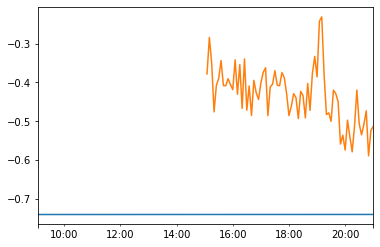

[LSTM] MSE of this prediction is: 0.0996299531034362
[LSTM] ************************ Average loss for the batches in the epoch: 0.7860287374782341
[LSTM] Epoch 2 / 10. Last epoch time was 725.3547039031982
[LSTM] loss of batch 1 / 216: 0.23060476779937744
[LSTM] loss of batch 2 / 216: 0.43873605132102966
[LSTM] loss of batch 3 / 216: 0.7022473812103271
[LSTM] loss of batch 4 / 216: 0.5619562268257141
[LSTM] loss of batch 5 / 216: 0.22961005568504333
[LSTM] loss of batch 6 / 216: 0.3142869174480438
[LSTM] loss of batch 7 / 216: 0.5204488635063171
[LSTM] loss of batch 8 / 216: 0.5024248361587524
[LSTM] loss of batch 9 / 216: 0.448015958070755
[LSTM] loss of batch 10 / 216: 0.6883701086044312
[LSTM] loss of batch 11 / 216: 0.4265761077404022
[LSTM] loss of batch 12 / 216: 0.4454360902309418
[LSTM] loss of batch 13 / 216: 0.3088688552379608
[LSTM] loss of batch 14 / 216: 0.3708450496196747
[LSTM] loss of batch 15 / 216: 0.667016327381134
[LSTM] loss of batch 16 / 216: 0.2678097188472748
[L

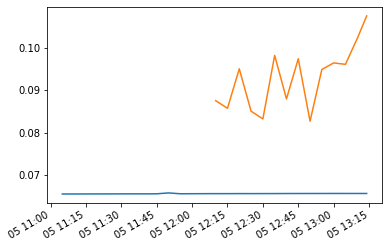

[LSTM] MSE of this prediction is: 0.0007932671720282464
[LSTM] ************************ Average loss for the batches in the epoch: 0.08391624219560374
[LSTM] Epoch 3 / 10. Last epoch time was 705.4803302288055
[LSTM] loss of batch 1 / 216: 0.006106356158852577
[LSTM] loss of batch 2 / 216: 0.013962397351861
[LSTM] loss of batch 3 / 216: 0.007155121304094791
[LSTM] loss of batch 4 / 216: 0.024780474603176117
[LSTM] loss of batch 5 / 216: 0.015295523218810558
[LSTM] loss of batch 6 / 216: 0.009099474176764488
[LSTM] loss of batch 7 / 216: 0.018065471202135086
[LSTM] loss of batch 8 / 216: 0.01930110901594162
[LSTM] loss of batch 9 / 216: 0.012523466721177101
[LSTM] loss of batch 10 / 216: 0.009221903048455715
[LSTM] loss of batch 11 / 216: 0.013309236615896225
[LSTM] loss of batch 12 / 216: 0.010477014817297459
[LSTM] loss of batch 13 / 216: 0.00825879443436861
[LSTM] loss of batch 14 / 216: 0.006205631420016289
[LSTM] loss of batch 15 / 216: 0.014084805734455585
[LSTM] loss of batch 16 

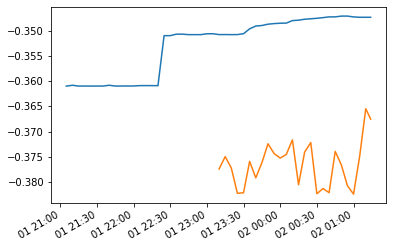

[LSTM] MSE of this prediction is: 0.0008029540667394241
[LSTM] ************************ Average loss for the batches in the epoch: 0.01105903281778511
[LSTM] Epoch 4 / 10. Last epoch time was 725.5488395690918
[LSTM] loss of batch 1 / 216: 0.0041440813802182674
[LSTM] loss of batch 2 / 216: 0.006632752250880003
[LSTM] loss of batch 3 / 216: 0.006425739265978336
[LSTM] loss of batch 4 / 216: 0.008822430856525898
[LSTM] loss of batch 5 / 216: 0.012650121003389359
[LSTM] loss of batch 6 / 216: 0.00666609313338995
[LSTM] loss of batch 7 / 216: 0.015549897216260433
[LSTM] loss of batch 8 / 216: 0.016137491911649704
[LSTM] loss of batch 9 / 216: 0.009693344123661518
[LSTM] loss of batch 10 / 216: 0.008531802333891392
[LSTM] loss of batch 11 / 216: 0.013286750763654709
[LSTM] loss of batch 12 / 216: 0.006498060189187527
[LSTM] loss of batch 13 / 216: 0.006480883806943893
[LSTM] loss of batch 14 / 216: 0.007193588186055422
[LSTM] loss of batch 15 / 216: 0.011874979361891747
[LSTM] loss of batc

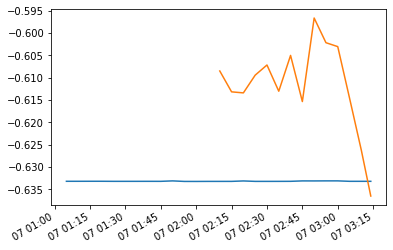

[LSTM] MSE of this prediction is: 0.0005560741123227217
[LSTM] ************************ Average loss for the batches in the epoch: 0.010604146252498376
[LSTM] Epoch 5 / 10. Last epoch time was 744.6519634723663
[LSTM] loss of batch 1 / 216: 0.006810893304646015
[LSTM] loss of batch 2 / 216: 0.009980710223317146
[LSTM] loss of batch 3 / 216: 0.006783569231629372
[LSTM] loss of batch 4 / 216: 0.020390773192048073
[LSTM] loss of batch 5 / 216: 0.012681848369538784
[LSTM] loss of batch 6 / 216: 0.012139475904405117
[LSTM] loss of batch 7 / 216: 0.026370402425527573
[LSTM] loss of batch 8 / 216: 0.02071438916027546
[LSTM] loss of batch 9 / 216: 0.011708802543580532
[LSTM] loss of batch 10 / 216: 0.009873130358755589
[LSTM] loss of batch 11 / 216: 0.018604503944516182
[LSTM] loss of batch 12 / 216: 0.008350886404514313
[LSTM] loss of batch 13 / 216: 0.009505230002105236
[LSTM] loss of batch 14 / 216: 0.011895936913788319
[LSTM] loss of batch 15 / 216: 0.012314201332628727
[LSTM] loss of batc

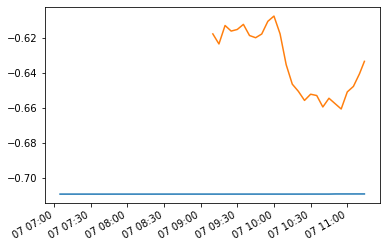

[LSTM] MSE of this prediction is: 0.005927397165647574
[LSTM] ************************ Average loss for the batches in the epoch: 0.01030182888563205
[LSTM] Epoch 6 / 10. Last epoch time was 736.6030285358429
[LSTM] loss of batch 1 / 216: 0.005491361021995544
[LSTM] loss of batch 2 / 216: 0.010045599192380905
[LSTM] loss of batch 3 / 216: 0.0072952453047037125
[LSTM] loss of batch 4 / 216: 0.011213096790015697
[LSTM] loss of batch 5 / 216: 0.01181607786566019
[LSTM] loss of batch 6 / 216: 0.008196897804737091
[LSTM] loss of batch 7 / 216: 0.01663690246641636
[LSTM] loss of batch 8 / 216: 0.015061920508742332
[LSTM] loss of batch 9 / 216: 0.009806635789573193
[LSTM] loss of batch 10 / 216: 0.008209179155528545
[LSTM] loss of batch 11 / 216: 0.014754751697182655
[LSTM] loss of batch 12 / 216: 0.007603911217302084
[LSTM] loss of batch 13 / 216: 0.008635804988443851
[LSTM] loss of batch 14 / 216: 0.006650867406278849
[LSTM] loss of batch 15 / 216: 0.009032297879457474
[LSTM] loss of batch 

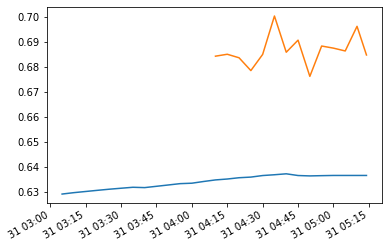

[LSTM] MSE of this prediction is: 0.002558210692648448
[LSTM] ************************ Average loss for the batches in the epoch: 0.008430510652639592
[LSTM] Epoch 7 / 10. Last epoch time was 750.9243607521057
[LSTM] loss of batch 1 / 216: 0.00401402497664094
[LSTM] loss of batch 2 / 216: 0.006505076307803392
[LSTM] loss of batch 3 / 216: 0.009135659784078598
[LSTM] loss of batch 4 / 216: 0.009090729057788849
[LSTM] loss of batch 5 / 216: 0.01047878060489893
[LSTM] loss of batch 6 / 216: 0.00889616459608078
[LSTM] loss of batch 7 / 216: 0.012935906648635864
[LSTM] loss of batch 8 / 216: 0.009806990623474121
[LSTM] loss of batch 9 / 216: 0.008576028048992157
[LSTM] loss of batch 10 / 216: 0.005959297064691782
[LSTM] loss of batch 11 / 216: 0.010610289871692657
[LSTM] loss of batch 12 / 216: 0.005790380761027336
[LSTM] loss of batch 13 / 216: 0.005292295943945646
[LSTM] loss of batch 14 / 216: 0.004971337970346212
[LSTM] loss of batch 15 / 216: 0.009323792532086372
[LSTM] loss of batch 1

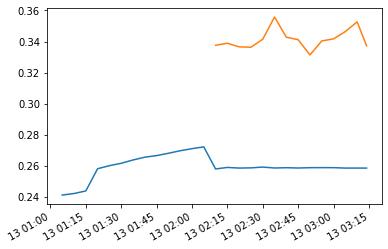

[LSTM] MSE of this prediction is: 0.006905663458246894
[LSTM] ************************ Average loss for the batches in the epoch: 0.008875624154892715
[LSTM] Epoch 8 / 10. Last epoch time was 905.0109150409698
[LSTM] loss of batch 1 / 216: 0.005421227775514126
[LSTM] loss of batch 2 / 216: 0.006965645123273134
[LSTM] loss of batch 3 / 216: 0.005985056981444359
[LSTM] loss of batch 4 / 216: 0.011451691389083862
[LSTM] loss of batch 5 / 216: 0.011915018782019615
[LSTM] loss of batch 6 / 216: 0.0079102274030447
[LSTM] loss of batch 7 / 216: 0.015138103626668453
[LSTM] loss of batch 8 / 216: 0.012368766590952873
[LSTM] loss of batch 9 / 216: 0.008807362988591194
[LSTM] loss of batch 10 / 216: 0.006671405863016844
[LSTM] loss of batch 11 / 216: 0.013322378508746624
[LSTM] loss of batch 12 / 216: 0.007348028011620045
[LSTM] loss of batch 13 / 216: 0.007130656391382217
[LSTM] loss of batch 14 / 216: 0.004786494188010693
[LSTM] loss of batch 15 / 216: 0.009574277326464653
[LSTM] loss of batch 

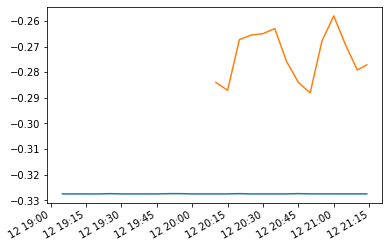

[LSTM] MSE of this prediction is: 0.002981497645132595
[LSTM] ************************ Average loss for the batches in the epoch: 0.00835749188209539
[LSTM] Epoch 9 / 10. Last epoch time was 838.5537805557251
[LSTM] loss of batch 1 / 216: 0.0036397569347172976
[LSTM] loss of batch 2 / 216: 0.007270157802850008
[LSTM] loss of batch 3 / 216: 0.0058508822694420815
[LSTM] loss of batch 4 / 216: 0.011294861324131489
[LSTM] loss of batch 5 / 216: 0.01196289248764515
[LSTM] loss of batch 6 / 216: 0.006537983193993568
[LSTM] loss of batch 7 / 216: 0.015384639613330364
[LSTM] loss of batch 8 / 216: 0.012982785701751709
[LSTM] loss of batch 9 / 216: 0.009335316717624664
[LSTM] loss of batch 10 / 216: 0.006469387095421553
[LSTM] loss of batch 11 / 216: 0.011419640854001045
[LSTM] loss of batch 12 / 216: 0.006529964506626129
[LSTM] loss of batch 13 / 216: 0.007384221535176039
[LSTM] loss of batch 14 / 216: 0.004559546243399382
[LSTM] loss of batch 15 / 216: 0.007754225749522448
[LSTM] loss of batc

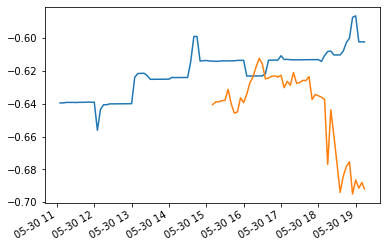

[LSTM] MSE of this prediction is: 0.0018916018984690003
[LSTM] ************************ Average loss for the batches in the epoch: 0.00830621515180812
[LSTM] Epoch 10 / 10. Last epoch time was 918.8689117431641
[LSTM] loss of batch 1 / 216: 0.003112222533673048
[LSTM] loss of batch 2 / 216: 0.006563255097717047
[LSTM] loss of batch 3 / 216: 0.007680084090679884
[LSTM] loss of batch 4 / 216: 0.012927170842885971
[LSTM] loss of batch 5 / 216: 0.011847180314362049
[LSTM] loss of batch 6 / 216: 0.0065096281468868256
[LSTM] loss of batch 7 / 216: 0.019357336685061455
[LSTM] loss of batch 8 / 216: 0.012045496143400669
[LSTM] loss of batch 9 / 216: 0.009664395824074745
[LSTM] loss of batch 10 / 216: 0.008273526094853878
[LSTM] loss of batch 11 / 216: 0.01378216315060854
[LSTM] loss of batch 12 / 216: 0.0077267782762646675
[LSTM] loss of batch 13 / 216: 0.007333280518651009
[LSTM] loss of batch 14 / 216: 0.004517429042607546
[LSTM] loss of batch 15 / 216: 0.009494993835687637
[LSTM] loss of ba

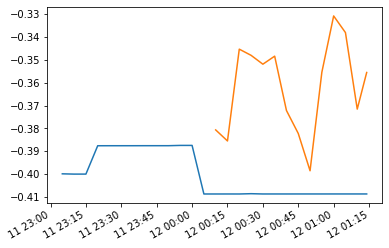

[LSTM] MSE of this prediction is: 0.0025754902955711988
[LSTM] ************************ Average loss for the batches in the epoch: 0.009419978830178647
[TEST BENCH] Training took 7955.951673269272 seconds.
[TEST BENCH] Starting testing loop


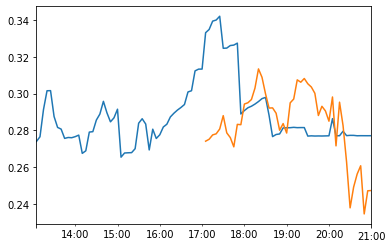

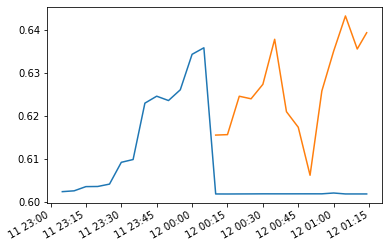

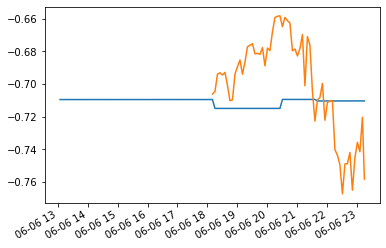

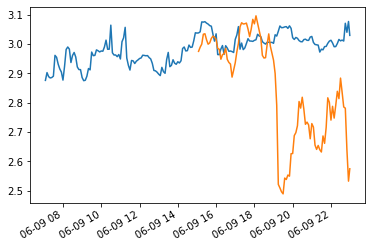

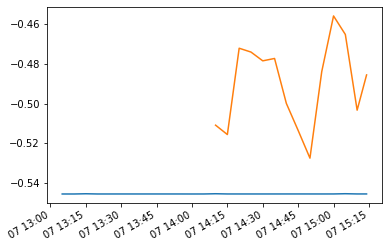

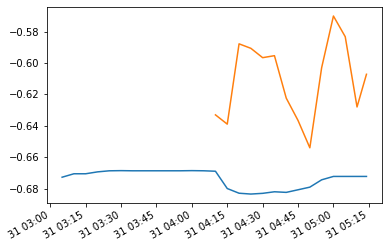

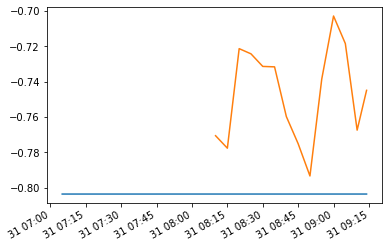

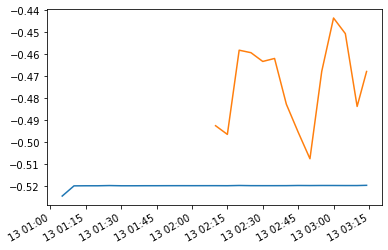

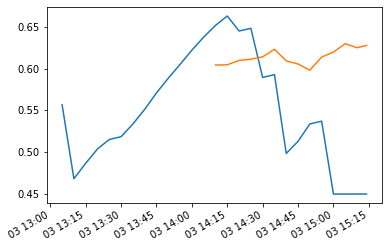

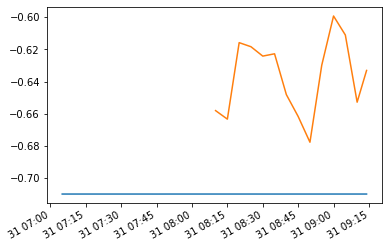

[TEST BENCH] ***********************************************************************
[TEST BENCH] REPORT for                              metric='node_mem', app='moc/smaug':
[TEST BENCH] Average mse over the test set is        0.020622921925236935
[TEST BENCH] Average precision over the test set is  0.7515243325136034
[TEST BENCH] Average recall over the test set is     0.4798885293217029
[TEST BENCH] Average F1 over the test set is         0.5783398536522177
[TEST BENCH] ***********************************************************************
[TEST BENCH] Done with metric='node_mem', app='moc/smaug'
[TEST BENCH] testing metric='node_mem', app='emea/balrog'.
[TEST BENCH] Fetching data for metric='node_mem', app='emea/balrog'.
[TEST BENCH] Subsampling data from 1 sample per 1 minute to 1 sample per 5 minutes.
[TEST BENCH] Throwing out data that is less than 100 minutes long.
[TEST BENCH] Scaling data.
[TEST BENCH] Splitting data into train and test
[TEST BENCH] Amount of train data is 20

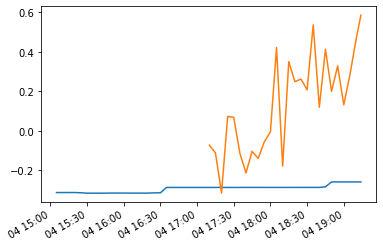

[LSTM] MSE of this prediction is: 0.22656673799004418
[LSTM] ************************ Average loss for the batches in the epoch: 0.7457136208550972
[LSTM] Epoch 2 / 10. Last epoch time was 39.43111610412598
[LSTM] loss of batch 1 / 57: 0.3862142860889435
[LSTM] loss of batch 2 / 57: 0.4687906801700592
[LSTM] loss of batch 3 / 57: 0.38504210114479065
[LSTM] loss of batch 4 / 57: 0.4384174644947052
[LSTM] loss of batch 5 / 57: 0.3125251531600952
[LSTM] loss of batch 6 / 57: 0.3173365592956543
[LSTM] loss of batch 7 / 57: 0.4764348268508911
[LSTM] loss of batch 8 / 57: 0.30855289101600647
[LSTM] loss of batch 9 / 57: 0.3571043312549591
[LSTM] loss of batch 10 / 57: 0.3479015529155731
[LSTM] loss of batch 11 / 57: 0.4829311966896057
[LSTM] loss of batch 12 / 57: 0.4090716540813446
[LSTM] loss of batch 13 / 57: 0.42912787199020386
[LSTM] loss of batch 14 / 57: 0.513093113899231
[LSTM] loss of batch 15 / 57: 0.4551047384738922
[LSTM] loss of batch 16 / 57: 0.4455249309539795
[LSTM] loss of b

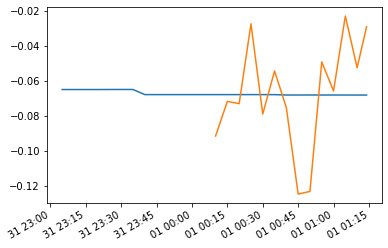

[LSTM] MSE of this prediction is: 0.0009267851796274832
[LSTM] ************************ Average loss for the batches in the epoch: 0.41257918978992264
[LSTM] Epoch 3 / 10. Last epoch time was 39.83461809158325
[LSTM] loss of batch 1 / 57: 0.3772473633289337
[LSTM] loss of batch 2 / 57: 0.414637953042984
[LSTM] loss of batch 3 / 57: 0.3835555911064148
[LSTM] loss of batch 4 / 57: 0.46102240681648254
[LSTM] loss of batch 5 / 57: 0.3085034489631653
[LSTM] loss of batch 6 / 57: 0.3581601083278656
[LSTM] loss of batch 7 / 57: 0.4886306822299957
[LSTM] loss of batch 8 / 57: 0.34870317578315735
[LSTM] loss of batch 9 / 57: 0.503825843334198
[LSTM] loss of batch 10 / 57: 0.5770024061203003
[LSTM] loss of batch 11 / 57: 0.48569396138191223
[LSTM] loss of batch 12 / 57: 0.6558537483215332
[LSTM] loss of batch 13 / 57: 0.8176398277282715
[LSTM] loss of batch 14 / 57: 0.6024472117424011
[LSTM] loss of batch 15 / 57: 0.9208357930183411
[LSTM] loss of batch 16 / 57: 0.7788060307502747
[LSTM] loss of

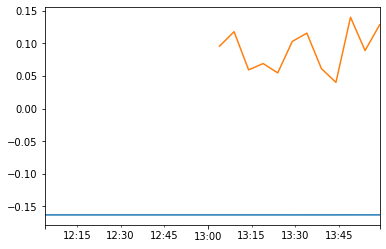

[LSTM] MSE of this prediction is: 0.06483166763518684
[LSTM] ************************ Average loss for the batches in the epoch: 0.8488470718526003
[LSTM] Epoch 4 / 10. Last epoch time was 39.5303590297699
[LSTM] loss of batch 1 / 57: 0.9388158917427063
[LSTM] loss of batch 2 / 57: 1.2505333423614502
[LSTM] loss of batch 3 / 57: 0.7091833353042603
[LSTM] loss of batch 4 / 57: 0.8102869987487793
[LSTM] loss of batch 5 / 57: 1.2085115909576416
[LSTM] loss of batch 6 / 57: 0.9595980048179626
[LSTM] loss of batch 7 / 57: 0.820367157459259
[LSTM] loss of batch 8 / 57: 0.4047131836414337
[LSTM] loss of batch 9 / 57: 0.5725829601287842
[LSTM] loss of batch 10 / 57: 1.0945134162902832
[LSTM] loss of batch 11 / 57: 0.6457247734069824
[LSTM] loss of batch 12 / 57: 0.6310670971870422
[LSTM] loss of batch 13 / 57: 0.7002829313278198
[LSTM] loss of batch 14 / 57: 0.6746662259101868
[LSTM] loss of batch 15 / 57: 1.672026515007019
[LSTM] loss of batch 16 / 57: 0.8648630976676941
[LSTM] loss of batch 

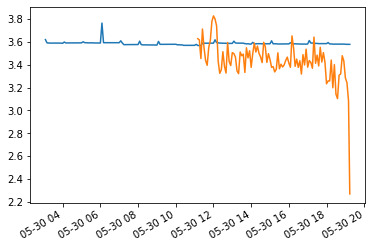

[LSTM] MSE of this prediction is: 0.0540717736568111
[LSTM] ************************ Average loss for the batches in the epoch: 0.5147744802790776
[LSTM] Epoch 5 / 10. Last epoch time was 39.00627946853638
[LSTM] loss of batch 1 / 57: 0.15424367785453796
[LSTM] loss of batch 2 / 57: 0.11221747100353241
[LSTM] loss of batch 3 / 57: 0.10854731500148773
[LSTM] loss of batch 4 / 57: 0.07770681381225586
[LSTM] loss of batch 5 / 57: 0.1108786016702652
[LSTM] loss of batch 6 / 57: 0.12262093275785446
[LSTM] loss of batch 7 / 57: 0.0955326035618782
[LSTM] loss of batch 8 / 57: 0.08353967219591141
[LSTM] loss of batch 9 / 57: 0.08540855348110199
[LSTM] loss of batch 10 / 57: 0.08718793839216232
[LSTM] loss of batch 11 / 57: 0.07347620278596878
[LSTM] loss of batch 12 / 57: 0.07321694493293762
[LSTM] loss of batch 13 / 57: 0.06430293619632721
[LSTM] loss of batch 14 / 57: 0.07679437845945358
[LSTM] loss of batch 15 / 57: 0.076015405356884
[LSTM] loss of batch 16 / 57: 0.08533408492803574
[LSTM] 

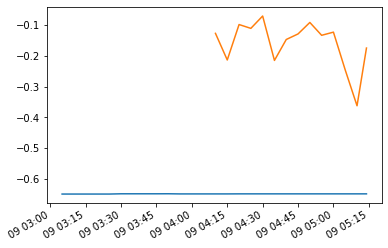

[LSTM] MSE of this prediction is: 0.2454048706034629
[LSTM] ************************ Average loss for the batches in the epoch: 0.1386862991933237
[LSTM] Epoch 6 / 10. Last epoch time was 39.65062952041626
[LSTM] loss of batch 1 / 57: 0.22102880477905273
[LSTM] loss of batch 2 / 57: 0.12772047519683838
[LSTM] loss of batch 3 / 57: 0.09059963375329971
[LSTM] loss of batch 4 / 57: 0.0944594293832779
[LSTM] loss of batch 5 / 57: 0.08296197652816772
[LSTM] loss of batch 6 / 57: 0.12203522026538849
[LSTM] loss of batch 7 / 57: 0.09098290652036667
[LSTM] loss of batch 8 / 57: 0.0932493805885315
[LSTM] loss of batch 9 / 57: 0.08895660191774368
[LSTM] loss of batch 10 / 57: 0.08221137523651123
[LSTM] loss of batch 11 / 57: 0.06973616778850555
[LSTM] loss of batch 12 / 57: 0.06873204559087753
[LSTM] loss of batch 13 / 57: 0.06601333618164062
[LSTM] loss of batch 14 / 57: 0.07924754917621613
[LSTM] loss of batch 15 / 57: 0.08907507359981537
[LSTM] loss of batch 16 / 57: 0.09095631539821625
[LSTM

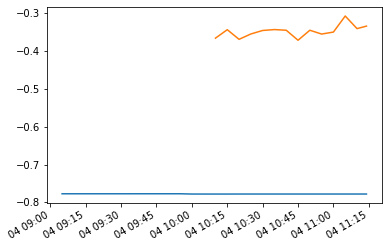

[LSTM] MSE of this prediction is: 0.1854098519126341
[LSTM] ************************ Average loss for the batches in the epoch: 0.058182288026600554
[LSTM] Epoch 7 / 10. Last epoch time was 43.16974186897278
[LSTM] loss of batch 1 / 57: 0.03397062048316002
[LSTM] loss of batch 2 / 57: 0.04002390056848526
[LSTM] loss of batch 3 / 57: 0.035549405962228775
[LSTM] loss of batch 4 / 57: 0.03482561931014061
[LSTM] loss of batch 5 / 57: 0.021649401634931564
[LSTM] loss of batch 6 / 57: 0.023609980940818787
[LSTM] loss of batch 7 / 57: 0.02827124297618866
[LSTM] loss of batch 8 / 57: 0.029560167342424393
[LSTM] loss of batch 9 / 57: 0.02524055354297161
[LSTM] loss of batch 10 / 57: 0.03316904604434967
[LSTM] loss of batch 11 / 57: 0.02509620226919651
[LSTM] loss of batch 12 / 57: 0.02074066363275051
[LSTM] loss of batch 13 / 57: 0.02666996791958809
[LSTM] loss of batch 14 / 57: 0.02482701651751995
[LSTM] loss of batch 15 / 57: 0.020263198763132095
[LSTM] loss of batch 16 / 57: 0.02059127949178

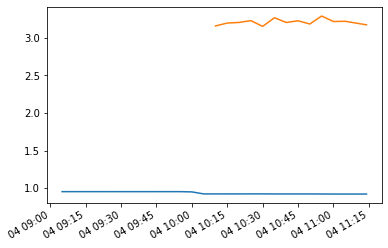

[LSTM] MSE of this prediction is: 5.240004329252323
[LSTM] ************************ Average loss for the batches in the epoch: 0.019060554963193442
[LSTM] Epoch 8 / 10. Last epoch time was 43.79871439933777
[LSTM] loss of batch 1 / 57: 0.011234641075134277
[LSTM] loss of batch 2 / 57: 0.01676061935722828
[LSTM] loss of batch 3 / 57: 0.01208457536995411
[LSTM] loss of batch 4 / 57: 0.012510398402810097
[LSTM] loss of batch 5 / 57: 0.01032114028930664
[LSTM] loss of batch 6 / 57: 0.007641379721462727
[LSTM] loss of batch 7 / 57: 0.017006488516926765
[LSTM] loss of batch 8 / 57: 0.009326571598649025
[LSTM] loss of batch 9 / 57: 0.00982456561177969
[LSTM] loss of batch 10 / 57: 0.011814414523541927
[LSTM] loss of batch 11 / 57: 0.011391776613891125
[LSTM] loss of batch 12 / 57: 0.009028822183609009
[LSTM] loss of batch 13 / 57: 0.006174743175506592
[LSTM] loss of batch 14 / 57: 0.010653594508767128
[LSTM] loss of batch 15 / 57: 0.013006608001887798
[LSTM] loss of batch 16 / 57: 0.010908091

KeyboardInterrupt: 

In [2]:
tb = bench.TestBench(
    class_to_test=lstm.LSTMTester,
#     tests_to_perform=[
#         {"metric": "node_mem", "app": "moc/smaug", "test percentage": 0.2, "sub sample rate": 5,
#          "data length limit": 20},
#     ],
    path_to_data="./data/"
)
tb.run_training_and_tests()